# INTRODUCTION

What is Alzhiemer's disease?

Alzheimer's disease (AD) is a neurodegenerative disease that usually starts slowly and progressively worsens and is the cause of 60–70% of cases of dementia. The most common early symptom is difficulty in remembering recent events. As the disease advances, symptoms can include problems with language, disorientation (including easily getting lost), mood swings, loss of motivation, self-neglect, and behavioral issues. As a person's condition declines, they often withdraw from family and society. Gradually, bodily functions are lost, ultimately leading to death. Although the speed of progression can vary, the average life expectancy following diagnosis is three to twelve years.

For more information visit:
https://en.wikipedia.org/wiki/Alzheimer's_disease



# IMPORT THE NECESSARY LIBRARIES

In [1]:
%%time

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import cv2, os, random
import plotly
import plotly.graph_objs as go
import plotly.express as px
import glob
import tensorflow
from plotly.offline import init_notebook_mode, plot, iplot
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split

#lIBRARIES TO HELP WITH TRAINING THE MODEL TO RECOGNISE ANY COLOUR OF IMAGE DATASET

from tqdm.notebook import tqdm
from termcolor import colored
import albumentations as A

#LIBRARIES TO HELP ADD THE FILE DIRECTORY TO THE CODE

from warnings import filterwarnings
filterwarnings("ignore")
from sklearn import set_config
set_config(print_changed_only = False)
directory = "C:\\Users\\HP\\Downloads"

#____________________________________________________________

print(colored("Required libraries were succesfully imported...", color = "green", attrs = ["bold", "dark"]))

Required libraries were succesfully imported...
CPU times: total: 5.95 s
Wall time: 16.1 s


# CHECK SYSTEM GPU

In [3]:
from warnings import filterwarnings
filterwarnings("ignore")


print(tensorflow.config.list_physical_devices("GPU"))

print("________________________________________________")

print(tensorflow.test.is_gpu_available(cuda_only = False, min_cuda_compute_capability = None))


[]
________________________________________________
False


In [4]:
print("Current tensorflow version == {}".format(tensorflow. __version__))

Current tensorflow version == 2.16.1


# LOAD ALZHIEMER'S DISEASE DATASET

In [5]:
%%time

train_df=glob.glob("C:/Users/HP/Downloads/Alzheimer_s Dataset/train/**/*.jpg")
test_df=glob.glob("C:/Users/HP/Downloads/Alzheimer_s Dataset/test/**/*.jpg")

print(colored("The datasets were succesfully loaded...", color="green", attrs=["bold", "dark"]))

The datasets were succesfully loaded...
CPU times: total: 31.2 ms
Wall time: 41.6 ms


# LOOK AT THE TRAIN AND TEST DATASET

In [6]:
train_df[:5], test_df[:5]

(['C:/Users/HP/Downloads/Alzheimer_s Dataset/train\\DEMENTED\\mildDem100.jpg',
  'C:/Users/HP/Downloads/Alzheimer_s Dataset/train\\DEMENTED\\mildDem101.jpg',
  'C:/Users/HP/Downloads/Alzheimer_s Dataset/train\\DEMENTED\\mildDem102.jpg',
  'C:/Users/HP/Downloads/Alzheimer_s Dataset/train\\DEMENTED\\mildDem103.jpg',
  'C:/Users/HP/Downloads/Alzheimer_s Dataset/train\\DEMENTED\\mildDem104.jpg'],
 ['C:/Users/HP/Downloads/Alzheimer_s Dataset/test\\DEMENTED\\26 (19).jpg',
  'C:/Users/HP/Downloads/Alzheimer_s Dataset/test\\DEMENTED\\26 (20).jpg',
  'C:/Users/HP/Downloads/Alzheimer_s Dataset/test\\DEMENTED\\26 (21).jpg',
  'C:/Users/HP/Downloads/Alzheimer_s Dataset/test\\DEMENTED\\26 (22).jpg',
  'C:/Users/HP/Downloads/Alzheimer_s Dataset/test\\DEMENTED\\26 (23).jpg'])

# DATA EXPLORATION

### How many images are in each dataset?

In [7]:
print("There is {} images in the training dataset".format(len(train_df)))
print("There is {} images in the test dataset".format(len(test_df)))


There is 3239 images in the training dataset
There is 1098 images in the test dataset


### How many of the pictures are diseased brain and how many are of normal brain?

In [8]:
datasets, demented_brain, normal_brain= ["train", "test"], [], []

for i in datasets:
    path=os.path.join("C:/Users/HP/Downloads/Alzheimer_s Dataset",i)
    normal=glob.glob(os.path.join(path, "NORMAL/*.jpg" ))
    demented=glob.glob(os.path.join(path, "DEMENTED/*.jpg"))
    normal_brain.extend(normal), demented_brain.extend(demented)
print("the number of alzhiemer images are {}".format(len(demented_brain)))
print("the number of non-alzhiemer images are {}".format(len(normal_brain)))

the number of alzhiemer images are 1182
the number of non-alzhiemer images are 3155


## SHUFFLE THE IMAGES

In [9]:
random.shuffle(normal_brain)
random.shuffle(demented_brain)
images = normal_brain[:50] + demented_brain[:50]
images[:10]

['C:/Users/HP/Downloads/Alzheimer_s Dataset\\train\\NORMAL\\nonDem2398.jpg',
 'C:/Users/HP/Downloads/Alzheimer_s Dataset\\test\\NORMAL\\30 (21).jpg',
 'C:/Users/HP/Downloads/Alzheimer_s Dataset\\train\\NORMAL\\nonDem507.jpg',
 'C:/Users/HP/Downloads/Alzheimer_s Dataset\\train\\NORMAL\\nonDem1125.jpg',
 'C:/Users/HP/Downloads/Alzheimer_s Dataset\\test\\NORMAL\\28 (22).jpg',
 'C:/Users/HP/Downloads/Alzheimer_s Dataset\\train\\NORMAL\\nonDem2406.jpg',
 'C:/Users/HP/Downloads/Alzheimer_s Dataset\\train\\NORMAL\\nonDem1637.jpg',
 'C:/Users/HP/Downloads/Alzheimer_s Dataset\\train\\NORMAL\\nonDem922.jpg',
 'C:/Users/HP/Downloads/Alzheimer_s Dataset\\train\\NORMAL\\nonDem426.jpg',
 'C:/Users/HP/Downloads/Alzheimer_s Dataset\\train\\NORMAL\\nonDem939.jpg']

## VIEW IMAGES IN VARIOUS FORMATS

### X-ray Form

X-ray imaging creates pictures of the inside of a body. The images show the parts of the brain in different shades of black and white.

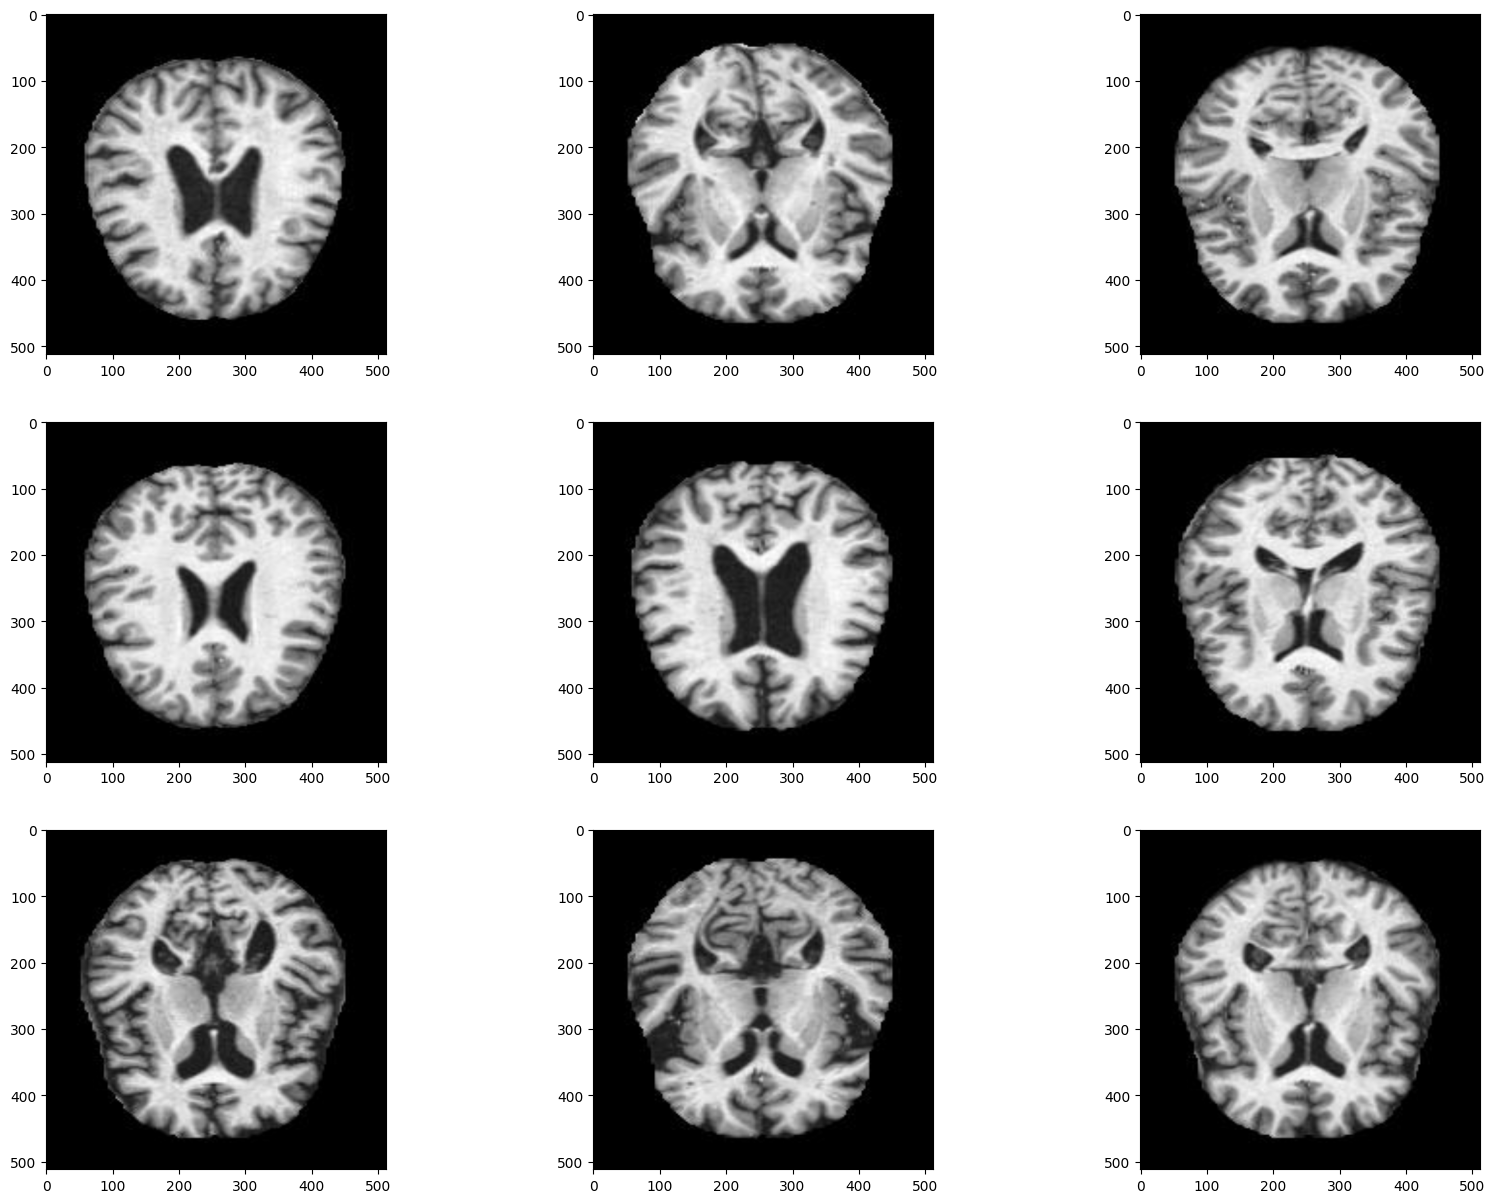

In [10]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3
for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

### Image Erosion Form

Erosion helps in reducing noise in binary images by removing small, unwanted pixels or regions. It smooths out irregularities in the image, making subsequent processing steps more effective.

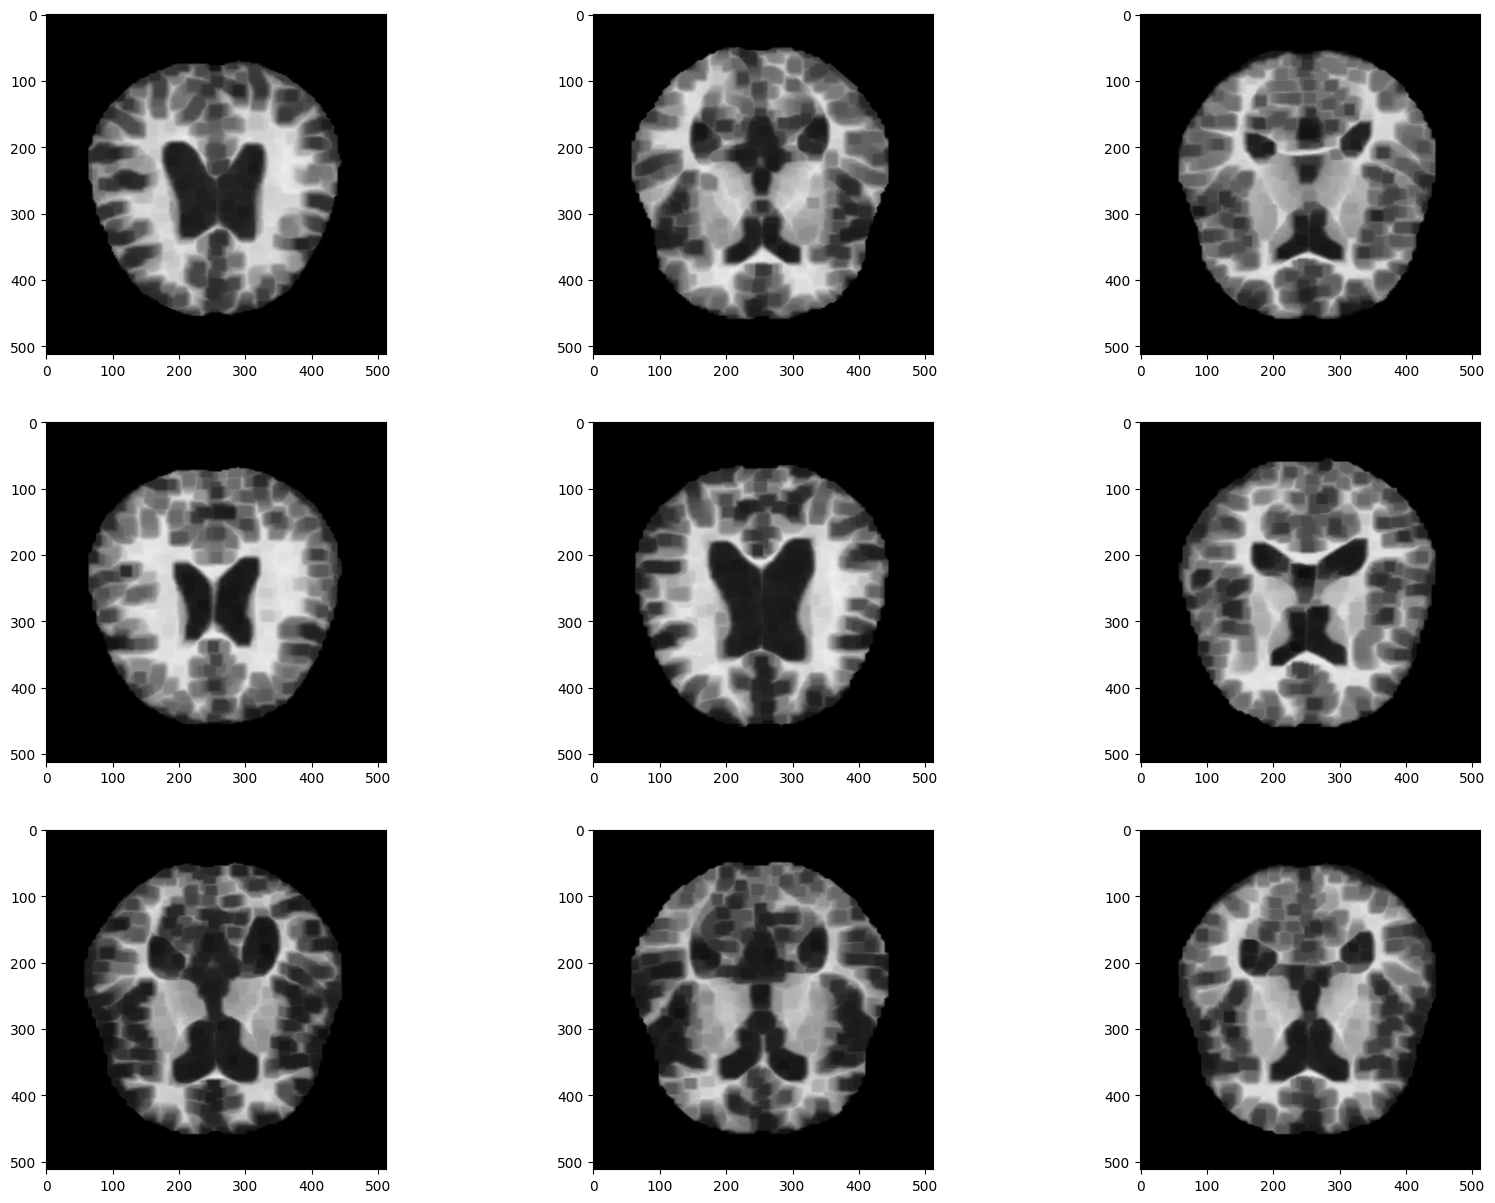

In [11]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3
for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    kernel = np.ones((5, 5), np.uint8)
    image_erosion = cv2.erode(img, kernel, iterations=3)
    fig.add_subplot(rows, columns, i)
    plt.imshow(image_erosion)

### GreyScaled Form

Also used for preprocessing of dataset to be used by AI model

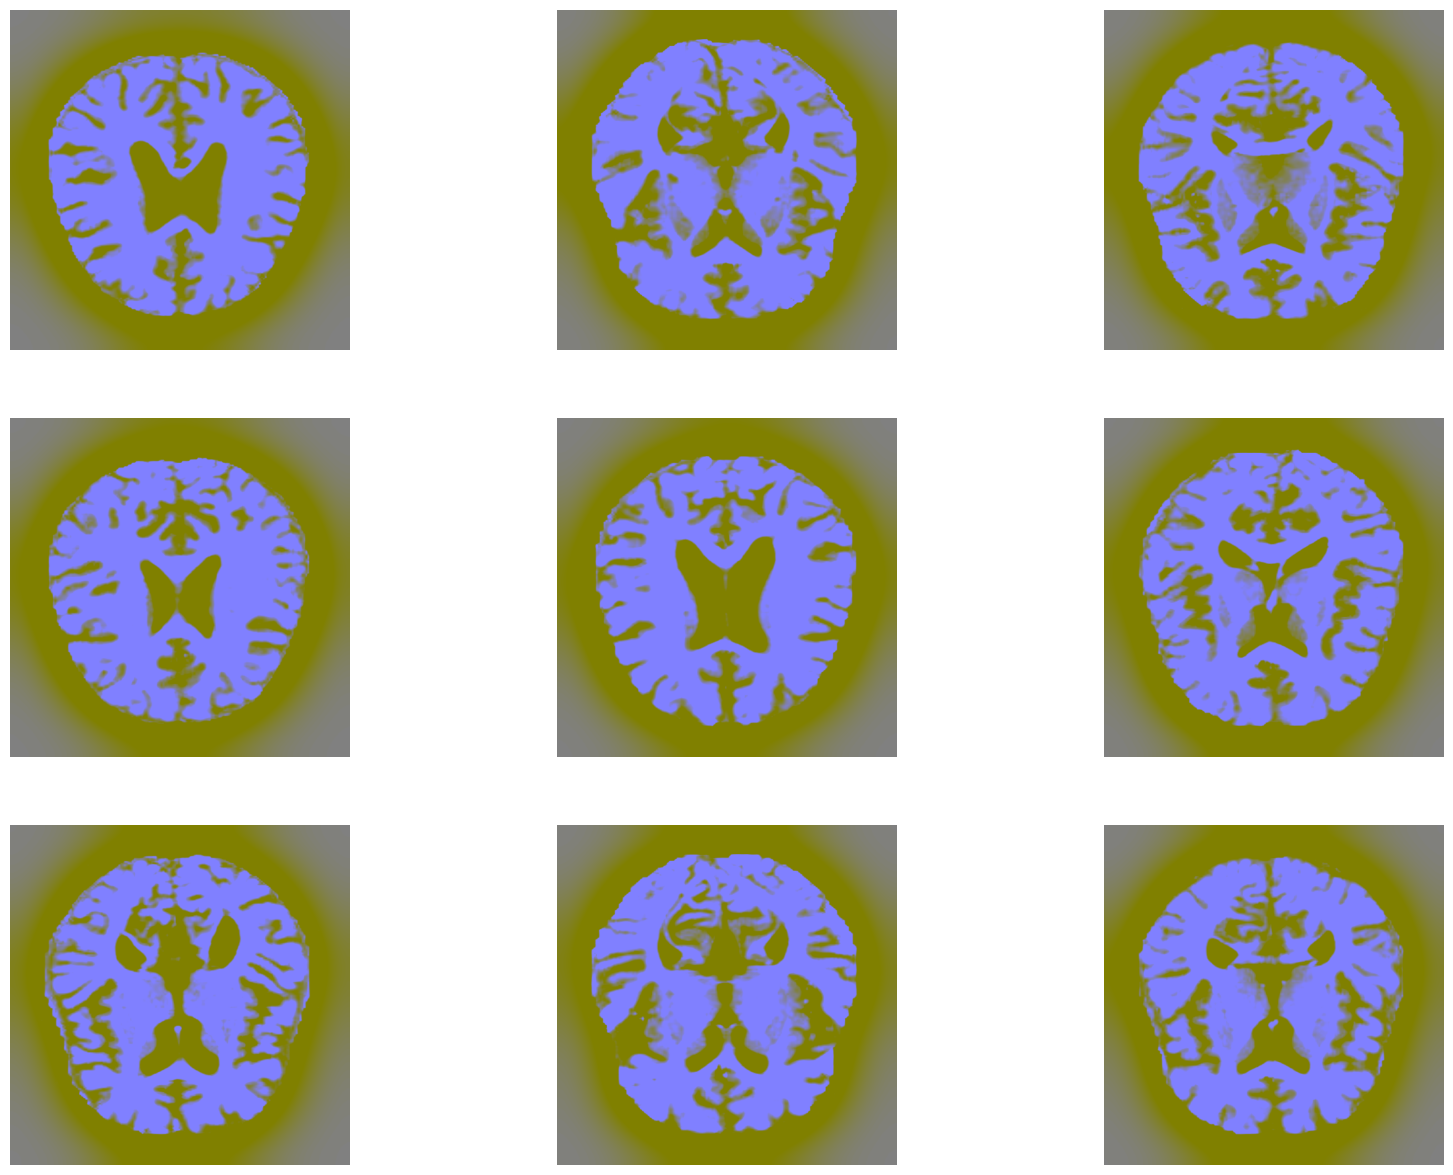

In [12]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    img = cv2.addWeighted (img, 4, cv2.GaussianBlur(img, (0, 0), 512/10), -4, 128)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
    plt.axis(False)

### Canny Edge Detection

Canny edge detection is a technique to extract useful structural information from different vision objects and dramatically reduce the amount of data to be processed. It has been widely applied in various computer vision system

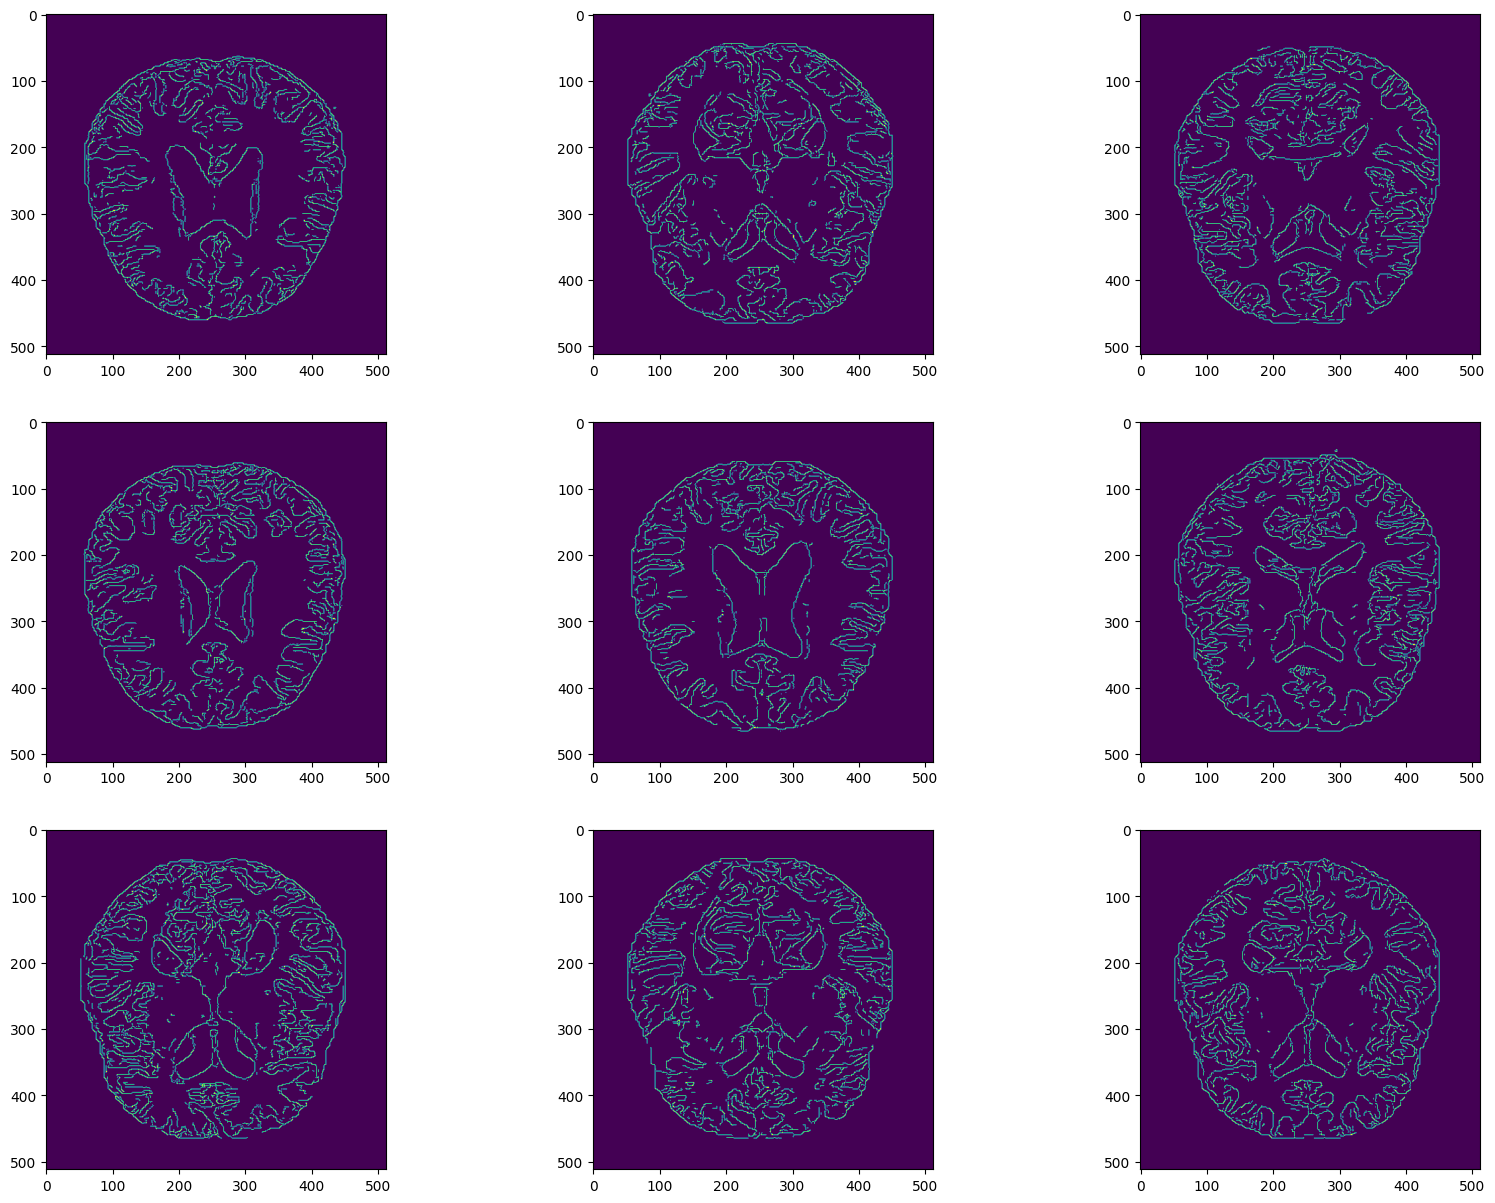

In [13]:
fig = plt.figure(figsize = (20, 15))
columns, rows = 3, 3

for i in range(1, 10):
    img = cv2.imread(images[i])
    img = cv2.resize(img, (512, 512))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    detected_edges = cv2.Canny(img, 80, 100)
    fig.add_subplot(rows, columns, i)
    plt.imshow(detected_edges)

# BUILD DEEP LEARNING MODELS 
For this project I trained four deep learning models which include the Convolutional Nueral Network (CNN), the Visual Geometry Group 16 (VGG-16), the Residual Network 50 (ResNet 50) and another modified Residual Network 50 (containing LeakyReLU and an alpha value of 0.1) for the purpose of determing if the modified ResNet 50 will be more accurate than other models and wil be effctive for th project.

In [109]:
train_dir = "C:/Users/HP/Downloads/Alzheimer_s Dataset/train"
test_dir = "C:/Users/HP/Downloads/Alzheimer_s Dataset/test"
validation_dir = "C:/Users/HP/Downloads/Alzheimer_s Dataset/validation"

In [110]:
%%time
from warnings import filterwarnings
filterwarnings("ignore")

train_datagen = ImageDataGenerator(
            rescale = 1/255.,
            horizontal_flip = True,
            vertical_flip = True,
            rotation_range = 0.3,
            zca_whitening = True,
            width_shift_range = 0.25,
            height_shift_range = 0.25,
            channel_shift_range = 0.35,
            shear_range = 0.2,
            zoom_range = 0.4)

val_test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(train_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))
validation_set = val_test_datagen.flow_from_directory(validation_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))
test_set = val_test_datagen.flow_from_directory(test_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))




Found 3239 images belonging to 2 classes.
Found 90 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
CPU times: total: 344 ms
Wall time: 368 ms


## Convolutional Nueral Network (CNN)

### Build Model

In [16]:
from tensorflow.keras.layers import BatchNormalization
from warnings import filterwarnings
filterwarnings("ignore")

model1 = Sequential()

# Convolutional layers
model1.add(Conv2D(32, (3, 3), strides=(1, 1), activation='relu', padding='same', input_shape=(224, 224, 3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

# Fully connected layers
model1.add(Dense(128, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(64, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(32, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='sigmoid'))

model1.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             2

 Total params: 6,824,257 (26.03 MB)

 Trainable params: 6,822,849 (26.03 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [17]:
model1.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

In [18]:
%%time

early_stopping_callbacks = tensorflow.keras.callbacks.EarlyStopping(patience = 15,
                                                                    restore_best_weights = True,
                                                                    verbose = 1)

CPU times: total: 0 ns
Wall time: 0 ns


### Train Model

In [19]:
%%time
from warnings import filterwarnings
filterwarnings("ignore")

history = model1.fit(train_set, epochs = 20,
                              validation_data = validation_set,
                              steps_per_epoch = 150,
                              callbacks = [early_stopping_callbacks])

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.5738 - loss: 0.7269 - val_accuracy: 0.5000 - val_loss: 1.6408
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 109s 722ms/step - accuracy: 0.7568 - loss: 0.4937 - val_accuracy: 0.5000 - val_loss: 1.5971
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 331s 2s/step - accuracy: 0.7821 - loss: 0.4575 - val_accuracy: 0.5000 - val_loss: 1.3743
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 99s 654ms/step - accuracy: 0.8000 - loss: 0.4226 - val_accuracy: 0.5000 - val_loss: 3.7345
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 256s 2s/step - accuracy: 0.7794 - loss: 0.4299 - val_accuracy: 0.5000 - val_loss: 1.8198
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 95s 628ms/step - accuracy: 0.7692 - loss: 0.4430 - val_accuracy: 0.7889 - val_loss: 0.5101
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.7676 - loss: 0.4306 - val_accuracy: 0.5000 - val_loss: 1.5734
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 87s 575ms/step - accuracy: 0.8016 - loss: 0.3813 -

### Visualize the performance of model

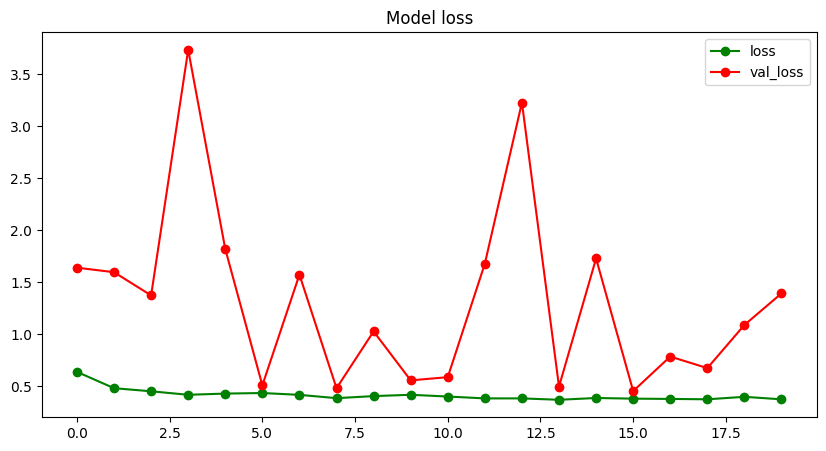

In [20]:
plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

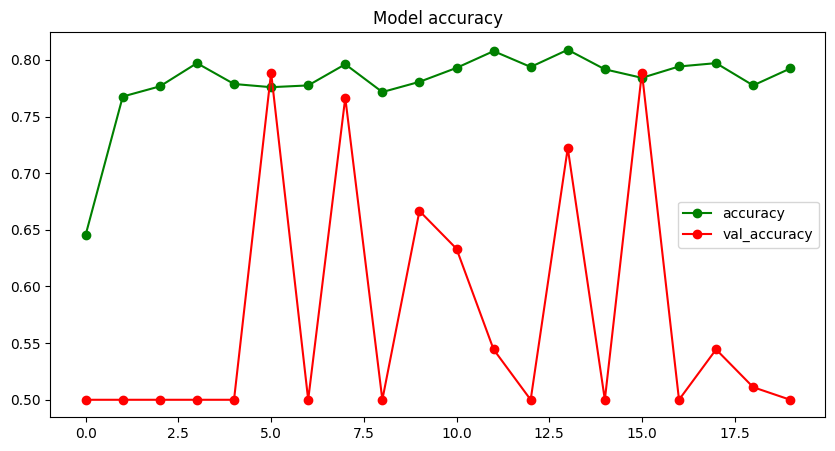

In [21]:
plt.figure(figsize = (10, 5))
plt.title("Model accuracy")

plt.plot(history.history["accuracy"], "go-")
plt.plot(history.history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

### Save model

In [27]:
model1.save("my_finalyear_alzhiemer_project_CNN_model.keras")
print(colored("Model1 was succesfully saved to disk...", color = "green", attrs = ["bold", "dark"]))

Model1 was succesfully saved to disk...


## Visual Geometry Group 16 (VGG-16)

### Build Model

In [55]:
from warnings import filterwarnings
filterwarnings("ignore")

base_model2 = VGG16(include_top = False,
                    weights = "imagenet", 
                    input_shape = (224, 224, 3), 
                    pooling = "max",
                    classes = 2)

#base_model1.load_weights("../input/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5")
base_model2.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d_2               │ (None, 512)                 │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
from warnings import filterwarnings
filterwarnings("ignore")


model2 = Sequential()
model2.add(base_model2)
model2.add(Flatten())

model2.add(Dense(256, activation = "relu"))
model2.add(BatchNormalization())
model2.add(Dense(128, activation = "relu"))
model2.add(BatchNormalization())
model2.add(Dense(64, activation = "relu"))
model2.add(BatchNormalization())
model2.add(Dense(32, activation = "relu"))
model2.add(BatchNormalization())
model2.add(Dense(1, activation = "sigmoid"))

# freeze the layers
for layer in base_model2.layers:
    layer.trainable = False

model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### Train Model

In [57]:
%%time
from warnings import filterwarnings
filterwarnings("ignore")


history = model2.fit(train_set, epochs = 20, validation_data = validation_set, steps_per_epoch = 150,
                               callbacks = [early_stopping_callbacks])

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 3574s 24s/step - accuracy: 0.6097 - loss: 0.6882 - val_accuracy: 0.5556 - val_loss: 0.6255
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 672s 4s/step - accuracy: 0.7609 - loss: 0.4859 - val_accuracy: 0.7222 - val_loss: 0.5460
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1775s 12s/step - accuracy: 0.7596 - loss: 0.4776 - val_accuracy: 0.7333 - val_loss: 0.5663
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 572s 4s/step - accuracy: 0.7907 - loss: 0.4431 - val_accuracy: 0.5556 - val_loss: 0.7750
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 1976s 13s/step - accuracy: 0.7780 - loss: 0.4358 - val_accuracy: 0.6000 - val_loss: 0.6850
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 692s 5s/step - accuracy: 0.8010 - loss: 0.4276 - val_accuracy: 0.5889 - val_loss: 0.8352
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2087s 14s/step - accuracy: 0.7916 - loss: 0.4168 - val_accuracy: 0.5222 - val_loss: 1.3332
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 697s 5s/step - accuracy: 0.7810 - loss: 0.4361 - 

### Visualize the performance of the model

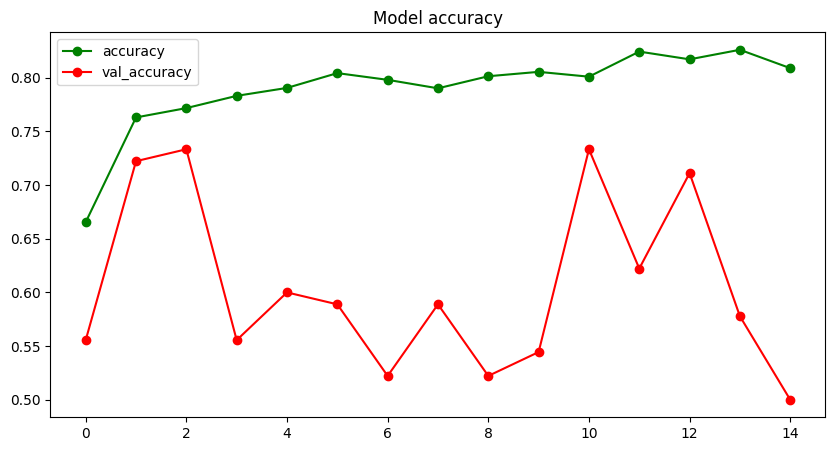

In [58]:
plt.figure(figsize = (10, 5))
plt.title("Model accuracy")
plt.plot(history.history["accuracy"], "go-")
plt.plot(history.history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

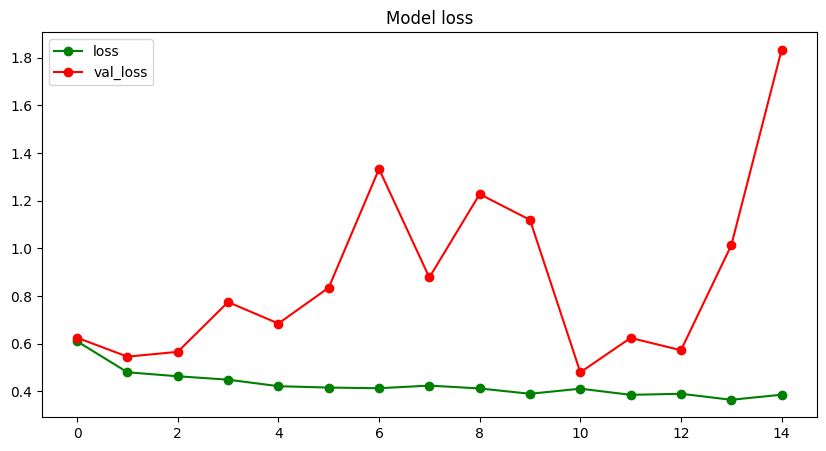

In [59]:
plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

### Save model

In [61]:
model2.save("my_finalyear_alzhiemer_project_VGG16_model.keras")
print(colored("Model2 was succesfully saved to disk...", color = "green", attrs = ["bold", "dark"]))

Model2 was succesfully saved to disk...


## First Residual Network 50 (ResNet50)

### Build Model

In [62]:
from warnings import filterwarnings
filterwarnings("ignore")


base_model3 = tensorflow.keras.applications.ResNet50V2(weights = "imagenet",
                                                       input_shape = (224, 224, 3),
                                                       pooling = "max", include_top = False,
                                                       classes = 2)

for layer in base_model3.layers:
    layer.trainable = False
    
base_model3.summary()

Model: "resnet50v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 56, 56, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 56, 56, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 58, 58, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,564,800 (89.89 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,564,800 (89.89 MB)

In [63]:
from warnings import filterwarnings
filterwarnings("ignore")


model3 = Sequential()
model3.add(base_model3)
model3.add(Flatten())

model3.add(Dense(256, activation = "relu"))
model3.add(BatchNormalization())
model3.add(Dense(128, activation = "relu"))
model3.add(BatchNormalization())
model3.add(Dense(64, activation = "relu"))
model3.add(BatchNormalization())
model3.add(Dense(32, activation = "relu"))
model3.add(BatchNormalization())
model3.add(Dense(1, activation = "sigmoid"))

# freeze the layers
for layer in base_model3.layers:
    layer.trainable = False

model3.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

### Train Model

In [64]:
%%time
from warnings import filterwarnings
filterwarnings("ignore")


history = model3.fit(train_set, epochs = 20, validation_data = validation_set, steps_per_epoch = 150,
                              callbacks = [early_stopping_callbacks])

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 215s 1s/step - accuracy: 0.6219 - loss: 0.7131 - val_accuracy: 0.6000 - val_loss: 0.6793
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 76s 505ms/step - accuracy: 0.7762 - loss: 0.4836 - val_accuracy: 0.6556 - val_loss: 0.7138
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 2776s 19s/step - accuracy: 0.7874 - loss: 0.4647 - val_accuracy: 0.5778 - val_loss: 0.7335
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 125s 825ms/step - accuracy: 0.7656 - loss: 0.4732 - val_accuracy: 0.5889 - val_loss: 0.7331
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 335s 2s/step - accuracy: 0.7926 - loss: 0.4159 - val_accuracy: 0.7111 - val_loss: 0.5510
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 124s 815ms/step - accuracy: 0.7699 - loss: 0.4451 - val_accuracy: 0.6000 - val_loss: 0.6526
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 29197s 196s/step - accuracy: 0.7957 - loss: 0.4123 - val_accuracy: 0.7222 - val_loss: 0.5397
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 74s 490ms/step - accuracy: 0.7974 - loss: 0

### Visualize performance of Model

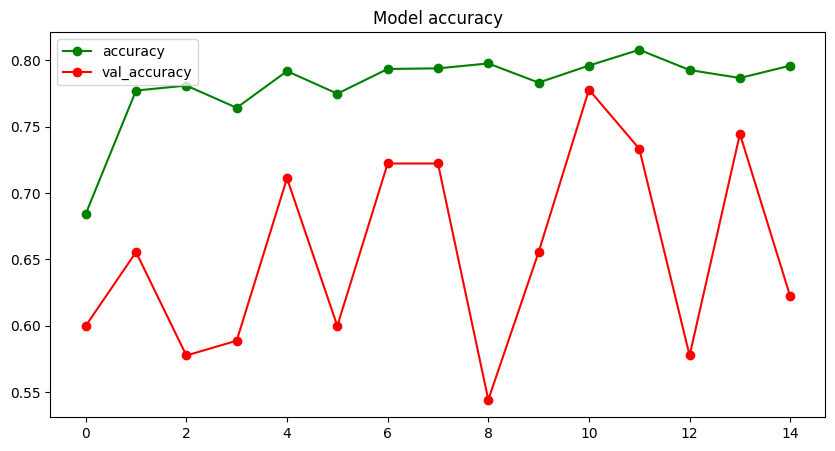

In [65]:
plt.figure(figsize = (10, 5))
plt.title("Model accuracy")
plt.plot(history.history["accuracy"], "go-")
plt.plot(history.history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

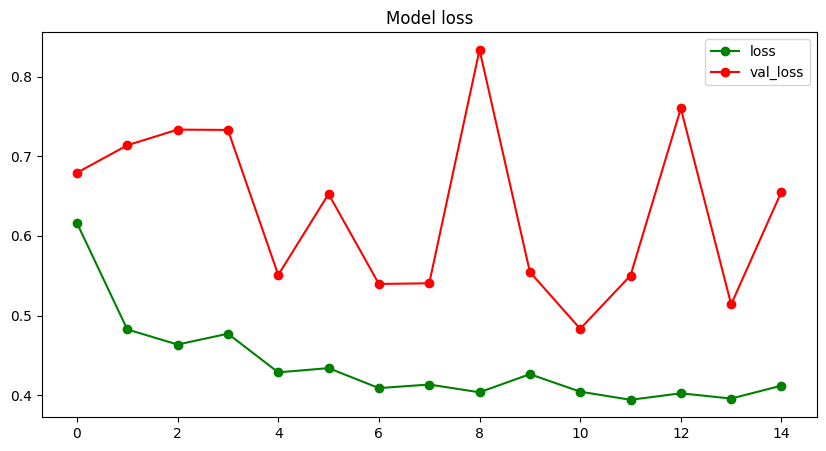

In [66]:
plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

### Save Model

In [68]:
model3.save("my_finalyear_alzhiemer_project_first_resnet50_model.keras")
print(colored("Model3 was succesfully saved to disk...", color = "green", attrs = ["bold", "dark"]))

Model3 was succesfully saved to disk...


## Second Residual Network 50 (ResNet50)

### Build Model

In [75]:
from tensorflow.keras.layers import LeakyReLU
import tensorflow as tf
from warnings import filterwarnings
filterwarnings("ignore")

base_model4 = tf.keras.applications.ResNet50V2(weights="imagenet", input_shape=(224, 224, 3), 
                                               pooling="max", include_top=False, classes=2)

for layer in base_model4.layers[:-10]:
    layer.trainable = False

    

In [76]:
from warnings import filterwarnings
filterwarnings("ignore")


model4 = Sequential()
model4.add(base_model4)
model4.add(Flatten())

model4.add(Dense(256, activation = "relu"))
model4.add(LeakyReLU(alpha=0.1))
model2.add(BatchNormalization())
model4.add(Dense(128, activation = "relu"))
model4.add(LeakyReLU(alpha=0.1))
model2.add(BatchNormalization())
model4.add(Dense(64, activation = "relu"))
model4.add(LeakyReLU(alpha=0.1))
model2.add(BatchNormalization())
model4.add(Dense(32, activation = "relu"))
model4.add(LeakyReLU(alpha=0.1))
model2.add(BatchNormalization())
model4.add(Dense(1, activation="sigmoid"))

for layer in base_model4.layers[-20:]:
    layer.trainable = True

model4.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])


### Train Model

In [77]:
%%time
from warnings import filterwarnings
filterwarnings("ignore")


history = model4.fit(train_set, epochs = 20, validation_data = validation_set, steps_per_epoch = 150,
                              callbacks = [early_stopping_callbacks])

Epoch 1/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 448s 3s/step - accuracy: 0.7339 - loss: 0.7596 - val_accuracy: 0.5000 - val_loss: 2.2244
Epoch 2/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 133s 876ms/step - accuracy: 0.7819 - loss: 0.4602 - val_accuracy: 0.7000 - val_loss: 0.5150
Epoch 3/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 346s 2s/step - accuracy: 0.7751 - loss: 0.4584 - val_accuracy: 0.5000 - val_loss: 0.5848
Epoch 4/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 164s 1s/step - accuracy: 0.7599 - loss: 0.4594 - val_accuracy: 0.5000 - val_loss: 0.5785
Epoch 5/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 337s 2s/step - accuracy: 0.7640 - loss: 0.4625 - val_accuracy: 0.5444 - val_loss: 1.7505
Epoch 6/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 112s 735ms/step - accuracy: 0.8247 - loss: 0.3861 - val_accuracy: 0.6000 - val_loss: 0.8716
Epoch 7/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 339s 2s/step - accuracy: 0.7884 - loss: 0.4145 - val_accuracy: 0.7889 - val_loss: 0.5254
Epoch 8/20
150/150 ━━━━━━━━━━━━━━━━━━━━ 114s 753ms/step - accuracy: 0.7916 - loss: 0.4049 -

### Visualize Performance of Model

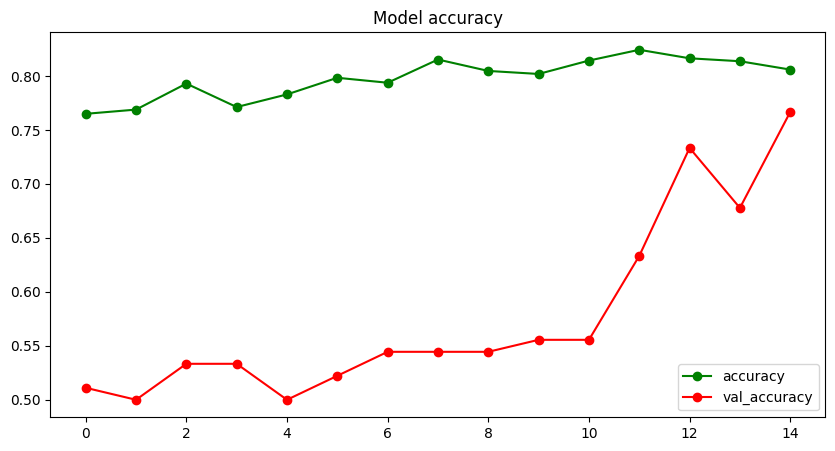

In [72]:
plt.figure(figsize = (10, 5))
plt.title("Model accuracy")
plt.plot(history.history["accuracy"], "go-")
plt.plot(history.history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

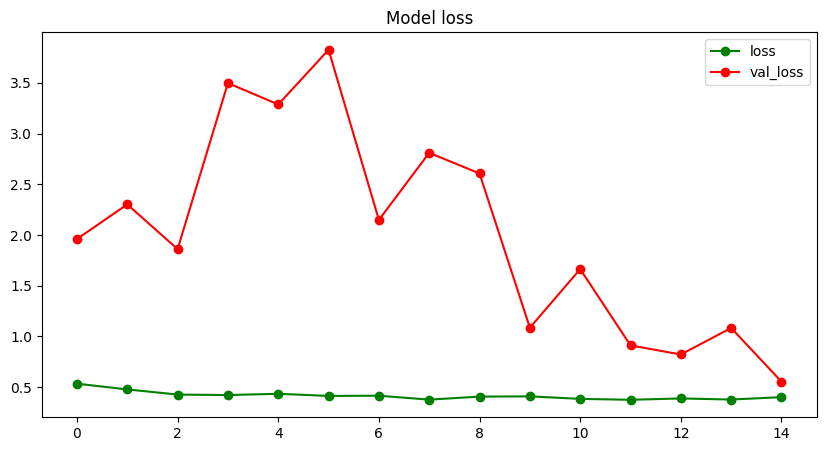

In [73]:
plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

### Save Model

In [90]:
model4.save("my_finalyear_alzhiemer_project_second_resnet50v2_model.keras")
print(colored("Model4 was succesfully saved to disk...", color = "green", attrs = ["bold", "dark"]))

Model4 was succesfully saved to disk...


# CONCLUSION
The Second ResNet50 has the same speed as the First ResNet50 and is slightly more accurate... but it has a high validation loss which makes it very ineffective for the project

# TESTING AND DETERMINE PERFORMANCE METRIC OF SAVED MODEL

In [99]:
model_loaded = tensorflow.keras.models.load_model("my_finalyear_alzhiemer_project_main_model.keras")

In [100]:
test_dir = "C:/Users/HP/Downloads/Alzheimer_s Dataset/test"
test_data, test_labels = [], []

In [101]:
for i in ["/NORMAL/", "/DEMENTED/"]:
    for image in (os.listdir(test_dir + i)):
        image = plt.imread(test_dir + i + image)
        image = cv2.resize(image, (224, 224))
        image = np.dstack([image, image, image])
        image = image.astype("float32") / 255
        if i == "/NORMAL/":
            label = 1
        elif i == "/DEMENTED/":
            label = 0
        test_data.append(image)
        test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)

## Plot Confusion Matrix

_______C o n f u s i o n   m a t r i x_______

50/50 ━━━━━━━━━━━━━━━━━━━━ 33s 610ms/step


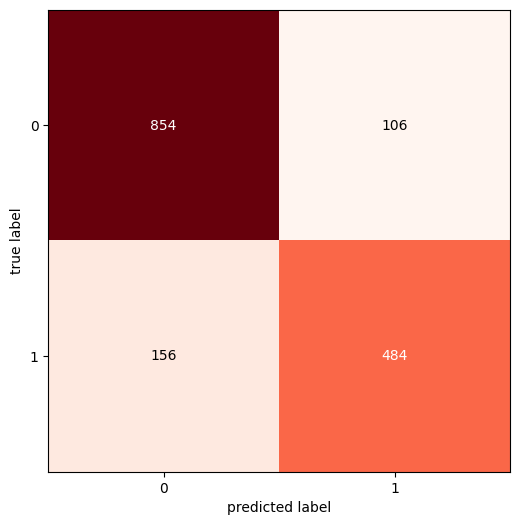

In [102]:
print("_______C o n f u s i o n   m a t r i x_______\n")

predictions = model_loaded.predict(test_data)
conf_m = confusion_matrix(test_labels, np.round(predictions))
acc = accuracy_score(test_labels, np.round(predictions)) * 100
tn, fp, fn, tp = conf_m.ravel()

fig, ax = plot_confusion_matrix(conf_mat = conf_m, figsize = (6, 6), cmap = matplotlib.pyplot.cm.Reds)
plt.show()

## Get Test Metrics

In [103]:
%%time

precision = tp / (tp + fp) * 100
recall = tp / (tp + fn) * 100
print("Accuracy: {}%".format(acc))
print("Precision: {}%".format(precision))
print("Recall: {}%".format(recall))
print("F1-score: {}".format(2 * precision * recall / (precision + recall)))   

Accuracy: 83.625%
Precision: 82.03389830508473%
Recall: 75.625%
F1-score: 78.69918699186992
CPU times: total: 0 ns
Wall time: 1.01 ms


## Let's display correct and incorrect predicted classes

In [115]:
predictions = list()
preds = model_loaded.predict(test_data)
for i in preds:
    if i >= 0.5:
        predictions.append(1)
    else:
        predictions.append(0)
predictions[:15]

50/50 ━━━━━━━━━━━━━━━━━━━━ 32s 629ms/step


[1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0]

In [116]:
correct_predictions = np.nonzero(predictions == test_labels)[0]
incorrect_predictions = np.nonzero(predictions != test_labels)[0]

# let's look at indices of correct predictions
print("Indices of correct predictions:\n", correct_predictions[:15])

# let's look at indices of incorrect correct predictions
print("\nIndices of incorrect predictions:\n", incorrect_predictions[:15])

Indices of correct predictions:
 [ 0  1  2  5  6  8  9 10 11 12 15 16 17 18 19]

Indices of incorrect predictions:
 [ 3  4  7 13 14 21 28 33 37 39 42 48 53 55 56]


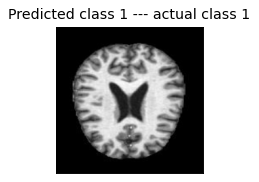

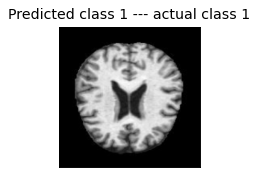

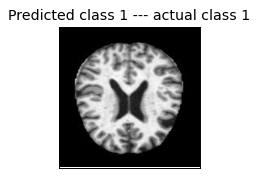

In [117]:
# display correct predictions

i = 0
for a in correct_predictions[:3]:
    plt.figure(figsize = (8, 6), dpi = 85)
    plt.subplot(3, 1, i + 1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(test_data[a].reshape(224, 224, 3))
    plt.title("Predicted class {} --- actual class {}".format(predictions[a], test_labels[a]))
    plt.tight_layout()
    i += 1

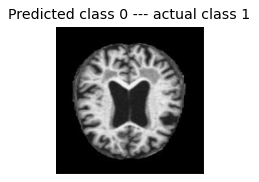

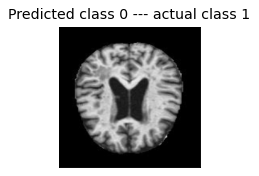

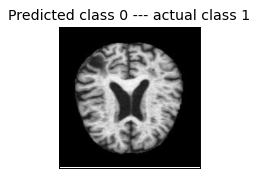

In [118]:
# display incorrect predictions

i = 0
for a in incorrect_predictions[:3]:
    plt.figure(figsize = (8, 6), dpi = 85)
    plt.subplot(3, 1, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_data[a].reshape(224, 224, 3))
    plt.title("Predicted class {} --- actual class {}".format(predictions[a], test_labels[a]))
    plt.tight_layout()
    i += 1